In [1]:
%matplotlib inline
import numpy as np
from numpy import linalg


import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.size'] = 10
import matplotlib.pyplot as plt

from SpinWelle import SpinWave, PowderAverage
from rotation import Rx, Ry, Rz

# Zig-zag state on a honeycomb lattice


lat = SpinWave([np.sqrt(3)/2,1.5],[-np.sqrt(3)/2,1.5], [np.sqrt(3), 0], [0,3])

lat.set_dist_units(3.054,'Å')

lat.add_atom('a',(0,1))
lat.add_atom('b',(-np.sqrt(3)/2, 0.5))
lat.add_atom('c',(-np.sqrt(3)/2,-0.5))
lat.add_atom('d',(0,-1))
    

def Jx(J, K, G, Gp, **args):
    return np.array([[J+K, Gp, Gp],
                     [Gp,  J,  G ],
                     [Gp,  G,  J]])
def Jy(J, K, G, Gp, **args):
    return np.array([[J,   Gp,  G ],
                     [Gp, J+K, Gp ],
                     [G,   Gp,  J ]])
def Jz(J, K, G, Gp, **args):
    return np.array([[ J,   G,  Gp  ],
                     [ G,   J,  Gp  ],
                     [Gp,  Gp,  J+K ]])


# Coupling definition
lat.define_coupling('Jx')
lat.define_coupling('Jy')
lat.define_coupling('Jz')
lat.define_coupling('J2')
lat.define_coupling('J3')


lat.add_coupling('a', 'b', 'Jx', (-1, 0),color='green')
lat.add_coupling('d', 'c', 'Jx', (1, 0),color='green')

lat.add_coupling('a', 'b', 'Jy', (1, 0),color='red')
lat.add_coupling('c', 'd', 'Jy', (1, 0),color='red')

lat.add_coupling('b', 'c', 'Jz',(0,-1), color='blue')
lat.add_coupling('a', 'd', 'Jz',(0, 1), color='blue')

lat.add_coupling('a','d', 'J3', (0,-2), color='k')
lat.add_coupling('b','c', 'J3', (2,-1), color='k')
lat.add_coupling('c','b', 'J3', (2,1), color='k')

lat.add_coupling('b','c', 'J3', (0,2), color='k')
lat.add_coupling('a','d', 'J3', (-2,1), color='k')
lat.add_coupling('a','d', 'J3', (2,1), color='k')

r32 = np.sqrt(3)/2

lat.add_coupling('a','a', 'J2', (2*r32,0), color='orange')
lat.add_coupling('b','b', 'J2', (2*r32,0), color='orange')
lat.add_coupling('c','c', 'J2', (2*r32,0), color='orange')
lat.add_coupling('d','d', 'J2', (2*r32,0), color='orange')

lat.add_coupling('a','c', 'J2', (r32,1.5), color='orange')
lat.add_coupling('a','c', 'J2', (-r32,-1.5), color='orange')
lat.add_coupling('b','d', 'J2', (r32,1.5), color='orange')
lat.add_coupling('d','b', 'J2', (r32,1.5), color='orange')

lat.add_coupling('a','c', 'J2', (r32,-1.5), color='orange')
lat.add_coupling('a','c', 'J2', (-r32,1.5), color='orange')
lat.add_coupling('b','d', 'J2', (r32,-1.5), color='orange')
lat.add_coupling('d','b', 'J2', (r32,-1.5), color='orange')

e1 = np.array([np.sqrt(1/6), -np.sqrt(1/2), np.sqrt(1/3)])
e2 = np.array([np.sqrt(1/6), np.sqrt(1/2), np.sqrt(1/3)])
e3 = np.array([-np.sqrt(2/3), 0, np.sqrt(1/3)])

lat.set_spin_basis([e1,e2,e3])

In [2]:
def build_model(params, set_CGS=True):
    if set_CGS:
        ene, v = np.linalg.eigh( Jx(**params) + Jy(**params) - Jz(**params) - 3*params['J3']*np.eye(3) - 2*params['J2']*np.eye(3))

        v = v[:, np.argmin(ene)]

        lat.set_CGS('a', v)
        lat.set_CGS('b', v)
        lat.set_CGS('c', -v)
        lat.set_CGS('d', -v)
    
    lat.define_coupling('Jx', 0.5*Jx(**params))
    lat.define_coupling('Jy', 0.5*Jy(**params))
    lat.define_coupling('Jz', 0.5*Jz(**params))
    lat.define_coupling('J2', 0.5*params['J2']*np.eye(3))
    lat.define_coupling('J3', 0.5*params['J3']*np.eye(3))
    
#     print("Residuals:", lat.first_order_terms)
    

In [3]:
spec = PowderAverage(lat, gauss_broaden=0.135, intrinsic_broaden=0.2)
spec.intrinsic_broaden = 0.2

Co_3d_q = np.array([0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.6,0.7, 0.8,0.9, 1, 1.1])*4*np.pi
# Co0_3d_j0 = [1, 0.9619, 0.8627, 0.7345, 0.6046, 0.4872, 0.3866, 0.3028, 0.2341, 0.1785, 0.1340, 0.0708, 0.0325, 0.0102, -0.0018, -0.0077, -0.0099]

CoII_3d_j0 = np.array([1.0000, 0.9773, 0.9134, 0.8193, 0.7086, 0.5942, 0.4856, 0.3881, 0.3041, 0.2338, 0.1763, 0.0934,
0.0429, 0.0139, -0.0016, -0.0092, -0.0122])

spec.set_form_factor_arr(Co_3d_q, CoII_3d_j0)

In [8]:
cote_model = {
    'param FM': {'J': 0.2, 'J2': 0, 'J3': 1.6, 'K': -7.0, 'G': 0.5, 'Gp': 0.15},
    'param AFM': {'J': -3.5, 'J2': 0, 'J3': 1.1, 'K': 3.2, 'G': -3.0, 'Gp': 2}
}

# CoSb FM : param_FM11
# CoSb AFM : param_AFM6

cosb_model = {
    'param FM': {'J': -1.4, 'J2': 0.0, 'J3': 0.6, 'K': -10, 'G': -0.3, 'Gp': -0.6}, 
    'param AFM': {'J': -5, 'J2': 0.0, 'J3': 0.6, 'K': 2, 'G': -4, 'Gp': 0.3},
}

Text(0.5, 0, 'Intensity [arb. units]')

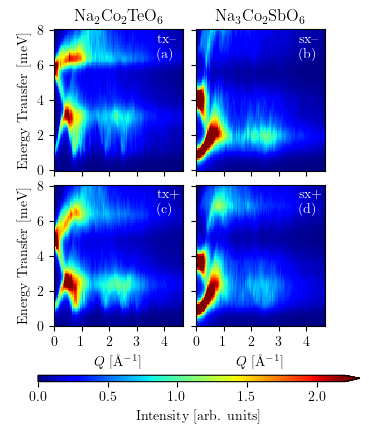

In [10]:
Egrid = np.linspace(0,8,100)
Qgrid = np.linspace(0.01,4.65,100)
# Qgrid = np.linspace(0.01,4.65,20)

fig0 = plt.figure()#constrained_layout=True)

# fig, axes = plt.subplots(3, 2, sharex=True, sharey=False,constrained_layout=True)
fig,  cfig = fig0.subfigures(2,1, height_ratios=[6,1])

axes = fig.subplots(2,2, sharex=True, sharey=True)


SAMP = 500

build_model(cote_model['param FM'])
# spec = PowderAverage(lat, gauss_broaden=0.135, intrinsic_broaden=0.2)
spec.calc_paverage(Egrid, Qgrid, num_samples=SAMP)
spec.plot_paverage(logscale=False,vmax=2.2,vmin=0, ax=axes[0][0], use_ffactor=True)

build_model(cote_model['param AFM'])
# spec = PowderAverage(lat, gauss_broaden=0.135, intrinsic_broaden=0.2)
spec.calc_paverage(Egrid, Qgrid, num_samples=SAMP)
spec.plot_paverage(logscale=False,vmax=2.2,vmin=0, ax=axes[1][0], use_ffactor=True)

build_model(cosb_model['param FM'])
# spec = PowderAverage(lat, gauss_broaden=0.135, intrinsic_broaden=0.2)
spec.calc_paverage(Egrid, Qgrid, num_samples=SAMP)
spec.plot_paverage(logscale=False,vmax=2.2,vmin=0, ax=axes[0][1], use_ffactor=True)

build_model(cosb_model['param AFM'])
# spec = PowderAverage(lat, gauss_broaden=0.135, intrinsic_broaden=0.2)
spec.calc_paverage(Egrid, Qgrid, num_samples=SAMP)
c = spec.plot_paverage(logscale=False,vmax=2.2,vmin=0, ax=axes[1][1], use_ffactor=True)

axes[0][0].set_ylabel('Energy Transfer [meV]')
axes[1][0].set_ylabel('Energy Transfer [meV]')
axes[1][0].set_xlabel("$Q$ [\AA$^{-1}$]")
axes[1][1].set_xlabel("$Q$ [\AA$^{-1}$]")

axes[0][0].set_title(r'Na$_2$Co$_2$TeO$_6$')
axes[0][1].set_title(r'Na$_3$Co$_2$SbO$_6$')


for row in axes:
    for ax in row:
        ax.xaxis.set_ticks([0,1,2,3,4])

text_x = 0.8
text_y = 0.8

axes[0][0].text(text_x, text_y,'tx--\n(a)'  ,transform=axes[0][0].transAxes, color='white')
axes[1][0].text(text_x, text_y,'tx+\n(c)'  ,transform=axes[1][0].transAxes, color='white')
axes[0][1].text(text_x, text_y,'sx--\n(b)'  ,transform=axes[0][1].transAxes, color='white')
axes[1][1].text(text_x, text_y,'sx+\n(d)'  ,transform=axes[1][1].transAxes, color='white')

fig0.set_size_inches(3.5,4.5)
    

fig.subplots_adjust(hspace=0.1,wspace=0.1)

# for r in axes:
#     for a in r:
#         a.plot(*edge,'magenta',lw=1)
        
cax = cfig.add_axes([0.08,0.8,0.92,0.1])
cfig.colorbar(c, cax=cax,orientation='horizontal',extend='max')
cax.set_xlabel('Intensity [arb. units]')

# plt.savefig('clean_output/unified_cote_cosb_paverage.png',dpi=300)


Text(0.5, 1.0, 'Na$_3$Co$_2$SbO$_6$')

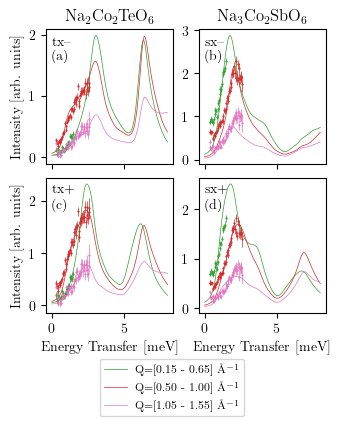

In [11]:
Egrid = np.linspace(0,8,100)



exp_cut_q = [0.4, 0.75, 1.3]
cote_exp_cut_data = [np.genfromtxt("CoTe/ansto_cuts/CoTe_0p05K_Q_%s_1.txt" % q) for q in "0p40 0p75 1p30".split()]
cosb_exp_cut_data = [np.genfromtxt("CoSb/ansto_cuts/CoSb_Q_%s_0p05K.txt" % q) for q in "0p4 0p75 1p3".split()]
exp_min_E = 0.3
cmap = plt.cm.get_cmap('tab10')


def plot_cuts(p, mult, dd, title='', dQ=0.1, ax=None):
    build_model(p)
        
    spec.ax_cuts=None
    for Q, data in zip(exp_cut_q, dd):
        col = cmap(Q/2)
        
        spec.plot_cut(Q, Egrid, dQ = dQ, use_ffactor=True, npoints=3000, color=col, ax=ax,lw=0.5)
        
        mask = data[:,0].searchsorted( exp_min_E)

        
        ax.errorbar(data[mask:,0], mult*data[mask:,1], yerr = mult*data[mask:,2],fmt='.', lw=0.5, ms=1.2, color=col ) 
        
#         y_offset += offset

    title += ' J={J}, K={K}, $\Gamma$={G}, $\Gamma\'$={Gp}, J2={J2}, J3={J3}'.format(**p)
    
#     ax.set_title(title)

#     ax.legend()
    
    
fig, axes=plt.subplots(2,2,sharex=True, figsize=(3.5,4.5))
    
plot_cuts(cote_model['param FM'],  90,  cote_exp_cut_data, dQ=0.25, ax=axes[0][0])
plot_cuts(cote_model['param AFM'], 140, cote_exp_cut_data, dQ=0.25, ax=axes[1][0])
plot_cuts(cosb_model['param FM'], 150,   cosb_exp_cut_data, dQ=0.25, ax=axes[0][1])
plot_cuts(cosb_model['param AFM'], 120, cosb_exp_cut_data, dQ=0.25, ax=axes[1][1])


axes[0][0].set_xlabel('')
axes[0][1].set_xlabel('')
axes[1][0].set_xlabel('Energy Transfer [meV]')
axes[1][1].set_xlabel('Energy Transfer [meV]')

axes[0][0].set_ylabel('Intensity [arb. units]')
axes[0][1].set_ylabel('')
axes[1][0].set_ylabel('Intensity [arb. units]')
axes[1][1].set_ylabel('')

axes[0][1].legend(prop={'size':8},bbox_to_anchor=(0.4,-1.4))
plt.subplots_adjust(left=0.15,right=0.95, wspace=0.2,hspace=0.1,bottom=0.25)
text_x = 0.05
text_y = 0.77

axes[0][0].text(text_x, text_y,'tx--\n(a)'  ,transform=axes[0][0].transAxes, color='k')
axes[1][0].text(text_x, text_y,'tx+\n(c)'  ,transform=axes[1][0].transAxes,  color='k')
axes[0][1].text(text_x, text_y,'sx--\n(b)'  ,transform=axes[0][1].transAxes, color='k')
axes[1][1].text(text_x, text_y,'sx+\n(d)'  ,transform=axes[1][1].transAxes,  color='k')

axes[0][0].set_title(r'Na$_2$Co$_2$TeO$_6$')
axes[0][1].set_title(r'Na$_3$Co$_2$SbO$_6$')

# plt.savefig('clean_output/unified_cuts.png',dpi=300)